# Regressão

*BREVE DESCRIÇÃO DO DATASET DE BOSTON*:

- CRIM: Taxa de criminalidade per capita por cidade

- ZN: Proporção de terrenos residenciais divididos em lotes com mais de 25.000 pés quadrados.

- INDUS: Proporção de acres de negócios não comerciais por cidade.

- CHAS: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário).

- NOX: Concentração de óxidos nítricos (partes por 10 milhões).

- RM : Número médio de quartos por habitação.

- AGE: Proporção de unidades ocupadas pelo proprietário construídas antes de 1940.

- DIS: Distâncias ponderadas para cinco centros de emprego em Boston.

- RAD: Índice de acessibilidade às rodovias radiais.

- TAX: Taxa de imposto sobre a propriedade de valor total por US $ 10.000.

- PTRATIO: Proporção aluno-professor por cidade.

- B: $1000(Bk - 0.63)^2$, onde Bk é a proporção de negros por cidade

- LSTAT: Porcentagem da população de status mais baixo.

- MEDV: Valor médio das casas ocupadas por proprietarios em incrementos de 1000 doloraes.

In [1]:
import pandas as pd
from sklearn import (
    model_selection,
    preprocessing
)
from sklearn.model_selection import train_test_split
from pathlib import Path

In [2]:
ROOT_DIR = Path.cwd().parent
DATA = ROOT_DIR / 'datasets' / 'housing.csv'

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(DATA, header=None, delimiter=r"\s+", names=column_names)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# a target do dataset de boston é o MEDV
bos_y = df.MEDV
bos_X = df.drop('MEDV', axis=1)
bos_X_train, bos_X_test, bos_y_train, bos_y_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [6]:
bos_sX = preprocessing.StandardScaler().fit_transform(bos_X)

In [7]:
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

## Modelo de base

In [8]:
from sklearn.dummy import DummyRegressor

In [9]:
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

## Regressão Linear

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(bos_X_train, bos_y_train)
lr.score(bos_X_test, bos_y_test)

0.7112260057484927

In [13]:
lr.coef_ # coeficientes da regressão linear

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [14]:
lr2 = LinearRegression()
lr2.fit(bos_sX_train, bos_sy_train)

LinearRegression()

In [15]:
lr2.score(bos_sX_test, bos_sy_test)

0.7112260057484926

In [16]:
lr2.intercept_

22.50945471291038

In [17]:
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

In [18]:
from yellowbrick.features import FeatureImportances
import matplotlib.pyplot as plt

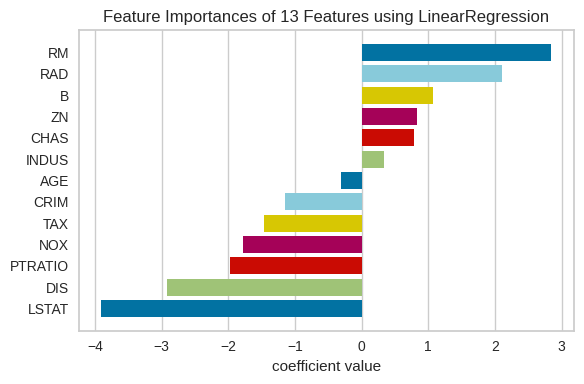

<Axes: title={'center': 'Feature Importances of 13 Features using LinearRegression'}, xlabel='coefficient value'>

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(
    lr2, labels=bos_X.columns, relative=False, ax=ax
)
fi_viz.fit(bos_sX, bos_y)
fi_viz.poof()

In [20]:
bos_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [21]:
bos_y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [22]:
from sklearn.svm import SVR

In [26]:
svr = SVR()
svr1 = SVR()

In [27]:
svr.fit(bos_sX_train, bos_sy_train)
svr1.fit(bos_X_train, bos_y_train)

SVR()

In [28]:
svr1.score(bos_X_test, bos_y_test)

0.281955630218394

In [25]:
svr.score(bos_sX_test, bos_sy_test)

0.6551893976487938

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
knr = KNeighborsRegressor()
knr1 = KNeighborsRegressor()

In [32]:
knr.fit(bos_sX_train, bos_sy_train)
knr1.fit(bos_X_train, bos_y_train)

KNeighborsRegressor()

In [33]:
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592416

In [34]:
knr1.score(bos_X_test, bos_y_test)

0.5846965270656936